In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sample = pd.DataFrame([[1000],[2000],[3000],[4000],[5000],[6000],[7000],[8000],[9000],[10000000]]
                      ,columns=['Salary'])
sample

,Salary
0,1000
1,2000
2,3000
3,4000
4,5000
5,6000
6,7000
7,8000
8,9000
9,10000000


In [3]:
#Technique 1 - Check statistical summary
sample.describe()

,Salary
count,1.000000e+01
mean,1.004500e+06
std,3.160698e+06
min,1.000000e+03
25%,3.250000e+03
50%,5.500000e+03
75%,7.750000e+03
max,1.000000e+07


In [4]:
sample.Salary.mean()

1004500.0

In [5]:
# from pandas.plotting import scatter_matrix
# sample.plot(kind="scatter", x="Salary",y='index',alpha=0.8)

Performing Outlier Detection

In [6]:
#1. IQR - Inter Quartile Range for detection Outlier
#Lower limit and upper limit for the given dataset considering fact that
# Your generalized data should be resides between 25% to 75% quartile

In [7]:
# Steps
#1. Arrange your data in ascending order
#2. Calculate Q1 (the 1st quarter) Q1,Q3 = np.percentile(sample.Salary,[25,75])
#3. Calculate Q3 (the 3rd quarter)
#4. Find IQR = Q3 -Q1
#5. Find lower range = Q1- (1.5*IQR)
#6. Find uppser range = Q3 + (1.5*IQR)

In [8]:
sorted(sample.Salary)

[1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000000]

In [9]:
Q1,Q3 = np.percentile(sample.Salary,[25,75])

In [10]:
Q1

3250.0

In [11]:
Q3

7750.0

In [12]:
IQR = Q3-Q1
IQR

4500.0

In [13]:
low_range = Q1- (1.5*IQR)
low_range

-3500.0

In [14]:
upper_range = Q3 + (1.5*IQR)
upper_range

14500.0

In [15]:
sample[sample.Salary > 14500]

,Salary
9,10000000


In [16]:
sample[(sample.Salary < -3500) | (sample.Salary > 14500)]

,Salary
9,10000000


In [17]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn, [25,75])
    IQR = Q3-Q1
    lower_range = Q1- (1.5*IQR)
    upper_range = Q3 + (1.5*IQR)
    return lower_range,upper_range

In [18]:
l,u = outlier_treatment(sample.Salary)

In [19]:
l

-3500.0

In [20]:
u

14500.0

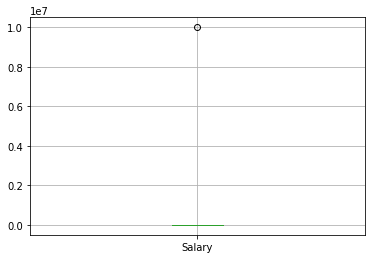

In [21]:
# You can also try the boxplot
for columns in sample:
    sample.boxplot(columns)

In [22]:
sample.drop(sample[ (sample.Salary > u) | (sample.Salary < l) ].index , inplace=True)
sample

,Salary
0,1000
1,2000
2,3000
3,4000
4,5000
5,6000
6,7000
7,8000
8,9000
